# COMP7103B Assignment 1 Association Rule

Lee Chung Ho (3036030037)

**Quesiton 1**

In [1]:
import numpy as np
import pandas as pd
import mlxtend as ml

In [2]:
# data_original = pd.read_csv(r'/Users/dannylee/Desktop/HKU/22-23 SEM2/Data Mining/assignment/Assignment1/Exercise 2/mammographic_masses.csv')
data_original = pd.read_csv(r'C:\Users\user\Desktop\HKU\22-23 SEM2\Data Mining\assignment\Assignment1\Exercise 2\mammographic_masses.csv')

In [3]:
data = data_original.copy()

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
len(data.columns)

6

In [6]:
# for i in range(len(data)):
#     for j in range(len(data.columns)):
#         if data.iloc[i,j] == "?":
#             data.iloc[i,j] = ""

In [7]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        data.iloc[i,j] = data.columns[j] + "=" +str(data.iloc[i,j])

In [8]:
data

,BI-RADS,Age,Shape,Margin,Density,Severity
0,BI-RADS=5,Age=67,Shape=3,Margin=5,Density=3,Severity=1
1,BI-RADS=4,Age=43,Shape=1,Margin=1,Density=?,Severity=1
2,BI-RADS=5,Age=58,Shape=4,Margin=5,Density=3,Severity=1
3,BI-RADS=4,Age=28,Shape=1,Margin=1,Density=3,Severity=0
4,BI-RADS=5,Age=74,Shape=1,Margin=5,Density=?,Severity=1
...,...,...,...,...,...,...
956,BI-RADS=4,Age=47,Shape=2,Margin=1,Density=3,Severity=0
957,BI-RADS=4,Age=56,Shape=4,Margin=5,Density=3,Severity=1
958,BI-RADS=4,Age=64,Shape=4,Margin=5,Density=3,Severity=0
959,BI-RADS=5,Age=66,Shape=4,Margin=5,Density=3,Severity=1


In [9]:
data_list = data.values.tolist()

In [10]:
te = TransactionEncoder()
data_encoded = te.fit(data_list).transform(data_list)

In [11]:
df = pd.DataFrame(data_encoded, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

ar = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

In [12]:
frequent_itemsets

,support,itemsets
0,0.569199,(BI-RADS=4)
1,0.360042,(BI-RADS=5)
2,0.830385,(Density=3)
3,0.371488,(Margin=1)
4,0.291363,(Margin=4)
5,0.536941,(Severity=0)
6,0.463059,(Severity=1)
7,0.233091,(Shape=1)
8,0.219563,(Shape=2)
9,0.416233,(Shape=4)


In [13]:
ar[["antecedents","consequents","support","confidence"]]

,antecedents,consequents,support,confidence
0,(Shape=4),(Density=3),0.374610,0.900000
1,"(Margin=1, Density=3)",(BI-RADS=4),0.263267,0.900356
2,"(Margin=1, Severity=0)",(BI-RADS=4),0.299688,0.911392
3,"(Margin=1, BI-RADS=4)",(Severity=0),0.299688,0.911392
4,"(Shape=4, BI-RADS=5)",(Density=3),0.245578,0.904215
5,"(Shape=4, BI-RADS=5)",(Severity=1),0.246618,0.908046
6,"(Shape=4, Severity=1)",(Density=3),0.295525,0.901587
7,"(Margin=1, Severity=0, Density=3)",(BI-RADS=4),0.238293,0.927126
8,"(Margin=1, Density=3, BI-RADS=4)",(Severity=0),0.238293,0.905138
9,"(Shape=4, Density=3, BI-RADS=5)",(Severity=1),0.224766,0.915254


The below 3 rules have support>0.2 and confidence>0.9:  
(Shape=4) -> (Density=3) with Support=0.374610 and Confidence=0.900000  
(Density=3, Margin=1) -> (BI-RADS=4) with Support=0.263267 and Confidence=0.900356  
(Margin=1, Severity=0) -> (BI-RADS=4) with Support=0.299688 and Confidence=0.911392  

**Question 2**

In [14]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

ar = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

In [15]:
ar[["antecedents","consequents","support","confidence"]]

,antecedents,consequents,support,confidence
0,(Margin=5),(Density=3),0.131113,0.926471
1,(Shape=4),(Density=3),0.374610,0.900000
2,"(Margin=1, Density=3)",(BI-RADS=4),0.263267,0.900356
3,"(Margin=1, Severity=0)",(BI-RADS=4),0.299688,0.911392
4,"(Margin=1, BI-RADS=4)",(Severity=0),0.299688,0.911392
5,"(Shape=1, BI-RADS=4)",(Severity=0),0.173777,0.907609
6,"(Shape=2, BI-RADS=4)",(Severity=0),0.162331,0.901734
7,"(Shape=4, BI-RADS=5)",(Density=3),0.245578,0.904215
8,"(Shape=4, BI-RADS=5)",(Severity=1),0.246618,0.908046
9,"(Margin=5, Severity=1)",(Density=3),0.110302,0.929825


In [16]:
# ar.consequents[1] == frozenset({'Density=3'})

In [17]:
ar_Severity_0 = ar[ar['consequents']==frozenset({'Severity=0'})]
ar_Severity_1 = ar[ar['consequents']==frozenset({'Severity=1'})]

In [18]:
# y = [x for x in ar_Severity_0['antecedents'] if 'BI-RADS=4' not in x]

In [19]:
# ar_Severity_0.iloc[1].name

In [20]:
# ar_Severity_0.iloc[1,0]

In [21]:
# for i in range(len(ar_Severity_0)):
#     for j in range(len(ar_Severity_0.columns)):
#         if 'BI-RADS=4' in ar_Severity_0.iloc[i,j]:
#             ar_Severity_0 = ar_Severity_0.drop(index=ar_Severity_0.iloc[i].name)

In [22]:
ar_Severity_0[["antecedents","consequents","support","confidence"]]

,antecedents,consequents,support,confidence
4,"(Margin=1, BI-RADS=4)",(Severity=0),0.299688,0.911392
5,"(Shape=1, BI-RADS=4)",(Severity=0),0.173777,0.907609
6,"(Shape=2, BI-RADS=4)",(Severity=0),0.162331,0.901734
12,"(Margin=1, Shape=2)",(Severity=0),0.136316,0.903448
14,"(Margin=1, Density=3, BI-RADS=4)",(Severity=0),0.238293,0.905138
18,"(Shape=1, Density=3, BI-RADS=4)",(Severity=0),0.145682,0.915033
21,"(Shape=1, Margin=1, BI-RADS=4)",(Severity=0),0.156087,0.909091
23,"(Margin=1, Shape=2, BI-RADS=4)",(Severity=0),0.124870,0.937500
28,"(Shape=1, Margin=1, Density=3)",(Severity=0),0.143600,0.901961
30,"(Shape=1, Margin=1, Density=3, BI-RADS=4)",(Severity=0),0.133195,0.920863


In [23]:
ar_Severity_1[["antecedents","consequents","support","confidence"]]

,antecedents,consequents,support,confidence
8,"(Shape=4, BI-RADS=5)",(Severity=1),0.246618,0.908046
24,"(Density=3, Margin=4, BI-RADS=5)",(Severity=1),0.121748,0.906977
25,"(Shape=4, Density=3, BI-RADS=5)",(Severity=1),0.224766,0.915254
27,"(Shape=4, Margin=4, BI-RADS=5)",(Severity=1),0.109261,0.913043


If we ignore rules involving BI-RADS, there are 2 rules:  
(Margin=1, Shape=2) -> (Severity=0) with Support=0.136316 and Confidence=0.903448  
(Density=3, Shape=1, Margin=1) -> (Severity=0) with Support=0.143600 and Confidence=0.901961  

The margin and the shape of the lesion can help us determining whether a lesion is benign.

**Question 3**

In [24]:
ar_Severity_0[["antecedents","consequents","support","confidence"]]

,antecedents,consequents,support,confidence
4,"(Margin=1, BI-RADS=4)",(Severity=0),0.299688,0.911392
5,"(Shape=1, BI-RADS=4)",(Severity=0),0.173777,0.907609
6,"(Shape=2, BI-RADS=4)",(Severity=0),0.162331,0.901734
12,"(Margin=1, Shape=2)",(Severity=0),0.136316,0.903448
14,"(Margin=1, Density=3, BI-RADS=4)",(Severity=0),0.238293,0.905138
18,"(Shape=1, Density=3, BI-RADS=4)",(Severity=0),0.145682,0.915033
21,"(Shape=1, Margin=1, BI-RADS=4)",(Severity=0),0.156087,0.909091
23,"(Margin=1, Shape=2, BI-RADS=4)",(Severity=0),0.124870,0.937500
28,"(Shape=1, Margin=1, Density=3)",(Severity=0),0.143600,0.901961
30,"(Shape=1, Margin=1, Density=3, BI-RADS=4)",(Severity=0),0.133195,0.920863


BI-RADS assessment: score from 0 (definitely benign) to 6 (highly suggestive of malignancy)  
By the definition of BI-RADS assessment score, if BI-RADS=4, the lesion is more likely to be malign than benign.  
However, from the above table, it can be observed that,  
(Margin=1, BI-RADS=4) -> (Severity=0) with Support=0.299688 and Confidence=0.911392  
(Shape=1, BI-RADS=4) -> (Severity=0) with Support=0.173777 and Confidence=0.907609  
   
These 2 rules have high Support and Confidence, but they have (Margin=1, BI-RADS=4) and (Shape=1, BI-RADS=4) pointing to (Severity=0). This means the leison may be determined as malign, which leads to unnecessary breast biopsy.  

**Question 4**

In [25]:
data = data_original.copy()

In [26]:
all = len(data)
age_35_df = data[data['Age']=='35']
age_35 = len(age_35_df)
# data_original[data_original['Age']=='35']
print(f'the Support of (age=35) is {age_35/all}')

the Support of (age=35) is 0.013527575442247659


In [27]:
Severity_0_df = data[data['Severity']==0]
Severity_0 = len(Severity_0_df)
print(f'the Support of (Severity=0) is {Severity_0/all}')

the Support of (Severity=0) is 0.5369406867845994


In [28]:
age_35_and_Severity_0 = len(age_35_df[age_35_df['Severity']==0])
print(f'the Support of (age=35) -> (Severity=0) is {age_35_and_Severity_0/all}')

the Support of (age=35) -> (Severity=0) is 0.012486992715920915


In [29]:
print(f'the Confidence of (age=35) -> (Severity=0) is {age_35_and_Severity_0/age_35}')

the Confidence of (age=35) -> (Severity=0) is 0.9230769230769231


The rule has a low support ~0.0125. That means that there are only a small portion (0.125) in the dataset are patients aged 35 whose leison is benign.  
   
However, the rule has a high confidence ~0.923. That means 92.3% of the patiants aged 35 have a benign leison. This is a valuable information because when a paitient has an age of 35, we can (92.3%) confidently tell that he has a benign leison.

**Question 5**

In [30]:
import matplotlib.pyplot as plt
import math

In [31]:
data = data_original.copy()

In [32]:
# replace the ? missing values with NaN

for i in range(len(data)):
    for j in range(len(data.columns)):
        if data.iloc[i,j] == "?":
            data.iloc[i,j] = float("NaN")
        else:
            data.iloc[i,j] = float(data.iloc[i,j])
        

In [33]:
data = data.sort_values(by=['Age'])

In [34]:
# data_original['Age'].unique()

In [35]:
# data_original[data_original['Age'].isna()]

In [36]:
# data_original['Age'].isna().sum()

In [37]:
# we need to determine an cut-off for age
# find the confidence of Age->(Severity=1) and the accumulated support
age_and_Severity_1 = pd.DataFrame(columns = ['Age->(Severity=1)', 'accumulated Support', 'Confidence'])
a_Support_i = 0
for age in data['Age'].unique():
    if math.isnan(age):
        age_df_i = data['Age'].isna().sum()
        Severity_1_df = data[data['Severity']==1]
        age_and_Severity_1_i= Severity_1_df['Age'].isna().sum()
    else:
        age_df = data[data['Age']==age]
        age_df_i = len(age_df)
        age_and_Severity_1_df = age_df[age_df['Severity']==1]
        age_and_Severity_1_i = len(age_and_Severity_1_df)
    a_Support_i += age_and_Severity_1_i/all
    confidence_i = age_and_Severity_1_i/age_df_i
    list_row = [float(age), a_Support_i, confidence_i]
    age_and_Severity_1.loc[len(age_and_Severity_1)] = list_row

In [38]:
age_and_Severity_1_sorted = age_and_Severity_1.sort_values(by=['Age->(Severity=1)'])
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       ):
    display(age_and_Severity_1_sorted)

,Age->(Severity=1),accumulated Support,Confidence
0,18.0,0.000000,0.000000
1,19.0,0.000000,0.000000
2,20.0,0.000000,0.000000
3,21.0,0.000000,0.000000
4,22.0,0.000000,0.000000
5,23.0,0.000000,0.000000
6,24.0,0.000000,0.000000
7,25.0,0.000000,0.000000
8,26.0,0.000000,0.000000
9,27.0,0.000000,0.000000


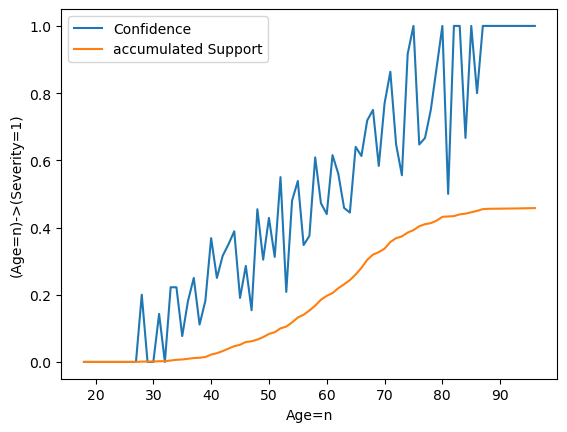

In [39]:
plt.plot(age_and_Severity_1_sorted['Age->(Severity=1)'],age_and_Severity_1_sorted['Confidence'] , label = "Confidence")
plt.plot(age_and_Severity_1_sorted['Age->(Severity=1)'],age_and_Severity_1_sorted['accumulated Support'] , label = "accumulated Support")
plt.legend()
plt.xlabel("Age=n")
plt.ylabel("(Age=n)->(Severity=1)")
plt.show()

The accumulated support of the rule (Age=n) ->(Severity=1) can reflect the support of the rule (Age≥n)->(Severity=1)  
Let's say we want to focus on the rule (Age≥n)->(Severity=1) with minimum support 0.1.  
We can choose n=35, where the accumulated spport surpass 0.1 at age=35.  

Then we get back to the missing values. Let's see what we can do with them.

In [40]:
data[data['Age'].isna()]

,BI-RADS,Age,Shape,Margin,Density,Severity
443,4.0,NaN,4.0,5.0,3.0,1
453,5.0,NaN,4.0,4.0,3.0,1
683,5.0,NaN,3.0,3.0,3.0,1
884,5.0,NaN,4.0,4.0,3.0,1
923,5.0,NaN,4.0,3.0,3.0,1


We do not know the missing values but we can make a good guess on whether the patient falls in the age range <35 or ≥35.  
We have to make a guess that we are confident with, by finding evidence to support our guess.  

Here are the condition we are going to filter:  
BI-RADS = 4 or 5 and  
Shape = 3 or 4 and  
Margin = 3, 4 or 5 and  
Density = 3 and  
Severity = 1  

In [41]:
filter_df = data[data['BI-RADS']> 3.0]
filter_df = filter_df[filter_df['BI-RADS']< 6.0]
filter_df = filter_df[filter_df['BI-RADS'].notna()]

In [42]:
filter_df = filter_df[filter_df['Shape']> 2.0]
filter_df = filter_df[filter_df['Shape'].notna()]

In [43]:
filter_df = filter_df[filter_df['Margin']> 2.0]
filter_df = filter_df[filter_df['Margin'].notna()]

In [44]:
filter_df = filter_df[filter_df['Density'] == 3.0]
filter_df = filter_df[filter_df['Severity'] == 1]
filter_df = filter_df[filter_df['Age'].notna()]

In [45]:
filter_df

,BI-RADS,Age,Shape,Margin,Density,Severity
592,4.0,28.0,4.0,4.0,3.0,1
873,4.0,36.0,4.0,5.0,3.0,1
431,5.0,36.0,4.0,3.0,3.0,1
186,5.0,37.0,4.0,4.0,3.0,1
405,5.0,37.0,4.0,4.0,3.0,1
...,...,...,...,...,...,...
458,5.0,87.0,4.0,5.0,3.0,1
165,5.0,87.0,4.0,5.0,3.0,1
797,5.0,87.0,4.0,4.0,3.0,1
360,4.0,88.0,4.0,4.0,3.0,1


In [46]:
all_filter = len(filter_df)
age_35_older_df = filter_df[filter_df['Age']>=35.0]
age_35_older = len(age_35_older_df)
print(f'the Support of (Conditions in all other columns in data entry with Age=NaN) -> (age≥35) is {age_35_older/all_filter}')

the Support of (Conditions in all other columns in data entry with Age=NaN) -> (age≥35) is 0.9965277777777778


We can be very (99.7%) confident to catagorize NaN values into age≥35 group.  
Then, we can find the assication rules:

In [47]:
data = data_original.copy()

In [48]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        if data.iloc[i,j] == "?":
            data.iloc[i,j] = float("NaN")
        else:
            data.iloc[i,j] = float(data.iloc[i,j])

In [49]:
data

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [50]:
age_greater_35 = []
for age in data['Age']:
    if math.isnan(age) or age >= 35:
        age_greater_35.append("Age≥35")
    else:
        age_greater_35.append("Age<35")
len(age_greater_35)

961

In [51]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        data.iloc[i,j] = data.columns[j] + "=" +str(data.iloc[i,j])

In [52]:
data['Age range'] = age_greater_35

In [53]:
data

,BI-RADS,Age,Shape,Margin,Density,Severity,Age range
0,BI-RADS=5.0,Age=67.0,Shape=3.0,Margin=5.0,Density=3.0,Severity=1,Age≥35
1,BI-RADS=4.0,Age=43.0,Shape=1.0,Margin=1.0,Density=nan,Severity=1,Age≥35
2,BI-RADS=5.0,Age=58.0,Shape=4.0,Margin=5.0,Density=3.0,Severity=1,Age≥35
3,BI-RADS=4.0,Age=28.0,Shape=1.0,Margin=1.0,Density=3.0,Severity=0,Age<35
4,BI-RADS=5.0,Age=74.0,Shape=1.0,Margin=5.0,Density=nan,Severity=1,Age≥35
...,...,...,...,...,...,...,...
956,BI-RADS=4.0,Age=47.0,Shape=2.0,Margin=1.0,Density=3.0,Severity=0,Age≥35
957,BI-RADS=4.0,Age=56.0,Shape=4.0,Margin=5.0,Density=3.0,Severity=1,Age≥35
958,BI-RADS=4.0,Age=64.0,Shape=4.0,Margin=5.0,Density=3.0,Severity=0,Age≥35
959,BI-RADS=5.0,Age=66.0,Shape=4.0,Margin=5.0,Density=3.0,Severity=1,Age≥35


In [54]:
data_list = data.values.tolist()
te = TransactionEncoder()
data_encoded = te.fit(data_list).transform(data_list)
df = pd.DataFrame(data_encoded, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
ar = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

In [55]:
frequent_itemsets

,support,itemsets
0,0.917794,(Age≥35)
1,0.569199,(BI-RADS=4.0)
2,0.360042,(BI-RADS=5.0)
3,0.830385,(Density=3.0)
4,0.371488,(Margin=1.0)
...,...,...
170,0.107180,"(Age≥35, Severity=1, Shape=4.0, Margin=4.0, BI..."
171,0.110302,"(Age≥35, Margin=1.0, Density=3.0, Shape=1.0, S..."
172,0.134235,"(Age≥35, Density=3.0, Shape=4.0, Severity=1, M..."
173,0.133195,"(Margin=1.0, Density=3.0, Shape=1.0, BI-RADS=4..."


In [56]:
ar_Severity_1 = ar[ar['consequents']==frozenset({'Severity=1'})]
ar_Severity_1[["antecedents","consequents","support","confidence"]]

,antecedents,consequents,support,confidence
36,"(Shape=4.0, BI-RADS=5.0)",(Severity=1),0.246618,0.908046
46,"(Density=3.0, Age≥35, BI-RADS=5.0)",(Severity=1),0.284079,0.900990
55,"(Age≥35, Shape=4.0, BI-RADS=5.0)",(Severity=1),0.243496,0.910506
78,"(Density=3.0, Margin=4.0, BI-RADS=5.0)",(Severity=1),0.121748,0.906977
79,"(Density=3.0, Shape=4.0, BI-RADS=5.0)",(Severity=1),0.224766,0.915254
81,"(Margin=4.0, Shape=4.0, BI-RADS=5.0)",(Severity=1),0.109261,0.913043
91,"(Density=3.0, Margin=4.0, Age≥35, BI-RADS=5.0)",(Severity=1),0.120708,0.913386
94,"(Density=3.0, Age≥35, Shape=4.0, BI-RADS=5.0)",(Severity=1),0.224766,0.919149
99,"(Margin=4.0, Age≥35, Shape=4.0, BI-RADS=5.0)",(Severity=1),0.107180,0.919643


After categorizing the age group, the newly added association rules with Severity=1 are:  
(Density=3, Age≥35, BI-RADS=5) -> (Severity=1)	with Support=0.284079	and Confidence=0.900990  
(Age≥35, BI-RADS=5, Shape=4) -> (Severity=1)	with Support=0.243496	and Confidence=0.910506  
(Density=3, Margin=4, Age≥35, BI-RADS=5) -> (Severity=1)	with Support=0.120708	and Confidence=0.913386  
(Density=3, Age≥35, BI-RADS=5, Shape=4) -> (Severity=1)	with Support=0.224766	and Confidence=0.919149  
(Margin=4, Age≥35, BI-RADS=5, Shape=4) -> (Severity=1)	with Support=0.107180	and Confidence=0.919643  